<a href="https://colab.research.google.com/github/vighnesh-18/focusmode/blob/main/aifinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Head_Pose_Database_UPNA.zip" -d "/content/drive/MyDrive/UPNA/"

Archive:  /content/drive/MyDrive/Head_Pose_Database_UPNA.zip
   creating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/
   creating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/Camera_parameters.mat  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/readme.rtf  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/readme.txt  
   creating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/User_01/
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/User_01/Thumbs.db  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01.mp4  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01_groundtruth2D.txt  
  inf

In [ ]:
import cv2
import random
import os
import shutil
import glob

# List of student videos
student_videos = [
    "user_01_video_01.mp4", "user_02_video_02.mp4", "user_03_video_03.mp4",
    "user_04_video_04.mp4", "user_05_video_05.mp4", "user_06_video_06.mp4",
    "user_07_video_07.mp4", "user_08_video_08.mp4", "user_09_video_09.mp4",
    "user_10_video_10.mp4"
]

# Base path where videos are stored
video_base_path = "/content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Head_Pose_Database_UPNA"

# Base path where frames will be saved
output_base_path = "/content/drive/MyDrive/student engagement"

# Loop through each student video with engagement status based on video index
for student_index, video_file in enumerate(student_videos, start=1):
    # Determine engagement status based on the video number
    if 1 <= student_index <= 4 or 9 <= student_index <= 10:
        engagement_status = "engaged"
    else:
        engagement_status = "not engaged"

    video_path = os.path.join(video_base_path, f"User_{student_index:02d}", video_file)

    # Load video
    video = cv2.VideoCapture(video_path)

    # Get video properties
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Randomly select 50 frames or fewer if the video has less than 50 frames
    frame_count = min(total_frames, 50)
    frame_indices = random.sample(range(total_frames), frame_count)

    # Create a directory for each student in the respective engagement category
    student_output_dir = os.path.join(output_base_path, engagement_status, f"student-{student_index}")
    os.makedirs(student_output_dir, exist_ok=True)

    # Loop through each selected frame
    for i in frame_indices:
        # Set the frame position
        video.set(cv2.CAP_PROP_POS_FRAMES, i)

        # Read frame
        ret, frame = video.read()
        if not ret:
            break

        # Save frame as an image file
        frame_filename = os.path.join(student_output_dir, f"frame_{i}.jpg")
        cv2.imwrite(frame_filename, frame)

    # Release video
    video.release()

print("Frames extracted and saved for all students in engaged/not engaged categories.")

Frames extracted and saved for all students in engaged/not engaged categories.


In [ ]:
import os
import shutil
import glob

# Define the path to the folder containing two folders for two labels and their images inside
dataset_dir = '/content/drive/MyDrive/student engagement'

# Flatten the directory structure
for class_name in ['engaged', 'not engaged']:
    class_dir = os.path.join(dataset_dir, class_name)
    student_dirs = glob.glob(os.path.join(class_dir, '*'))

    for student_dir in student_dirs:
        if os.path.isdir(student_dir):
            images = glob.glob(os.path.join(student_dir, '*.jpg'))
            for image in images:
                shutil.move(image, os.path.join(class_dir, os.path.basename(image)))
            os.rmdir(student_dir)  # Remove the empty student directory

print("Directory structure flattened successfully.")

Directory structure flattened successfully.


In [ ]:
import os
import shutil
import glob
from sklearn.model_selection import train_test_split

# Define the path to the folder containing two folders for two labels and their images inside
dataset_dir = '/content/drive/MyDrive/student engagement'
output_dir = '/content/drive/MyDrive/student_recognition_datastore'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Create the training and testing directories
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split data into training and testing sets
for class_name in ['engaged', 'not engaged']:
    class_dir = os.path.join(dataset_dir, class_name)
    images = glob.glob(os.path.join(class_dir, '*.jpg'))

    if len(images) == 0:
        print(f"No images found in {class_dir}. Please check the directory and try again.")
        continue

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create subdirectories for each class in train and test
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy images to train and test directories
    for image in train_images:
        shutil.copy(image, os.path.join(train_class_dir, os.path.basename(image)))
    for image in test_images:
        shutil.copy(image, os.path.join(test_class_dir, os.path.basename(image)))

print("Data split and copied successfully.")

Data split and copied successfully.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import class_weight
import numpy as np
import glob
import os

# Data augmentation and loading data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/student_recognition_datastore/train',  # Replace with the actual path to your training directory
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    color_mode='rgb'  # Change to 'rgb'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/student_recognition_datastore/test',  # Replace with the actual path to your testing directory
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'  # Change to 'rgb'
)

# Check data balance
print(f"Number of samples in 'engaged': {len(glob.glob(os.path.join('/content/drive/MyDrive/student_recognition_datastore/train', 'engaged', '*.jpg')))}")
print(f"Number of samples in 'not engaged': {len(glob.glob(os.path.join('/content/drive/MyDrive/student_recognition_datastore/train', 'not engaged', '*.jpg')))}")

# Build and train the model
height = 48
width = 48
channels = 3  # RGB images
input_shape = (height, width, channels)

from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Use GlobalAveragePooling2D instead of Flatten
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

base_model.trainable = False  # Freeze the base model

optimizer = Adam(learning_rate=0.0001)  # Reduced learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_set.classes),
    y=train_set.classes
)

class_weights = dict(enumerate(class_weights))

history = model.fit(
    train_set,
    steps_per_epoch=12,  # Set steps per epoch to 12
    epochs=50,  # Increased number of epochs
    validation_data=test_set,
    validation_steps=test_set.samples // 32,
    callbacks=[reduce_lr],
    class_weight=class_weights  # Use class weights
)

# Evaluate the model
y_pred_probs = model.predict(test_set)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # Flatten the predictions
true_labels = test_set.classes

accuracy = accuracy_score(true_labels, y_pred)
f1 = f1_score(true_labels, y_pred, zero_division=1)
precision = precision_score(true_labels, y_pred, zero_division=1)
recall = recall_score(true_labels, y_pred, zero_division=1)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Found 283 images belonging to 2 classes.
Found 71 images belonging to 2 classes.
Number of samples in 'engaged': 160
Number of samples in 'not engaged': 123
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.4805 - loss: 0.7419

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.4876 - loss: 0.7417 - val_accuracy: 0.5156 - val_loss: 0.6956 - learning_rate: 1.0000e-04
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5262 - loss: 0.7097 - val_accuracy: 0.1429 - val_loss: 0.7761 - learning_rate: 1.0000e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5608 - loss: 0.7325 - val_accuracy: 0.5781 - val_loss: 0.6818 - learning_rate: 1.0000e-04
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step - accuracy: 0.5737 - loss: 0.6872 - val_accuracy: 0.0000e+00 - val_loss: 0.7832 - learning_rate: 1.0000e-04
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5213 - loss: 0.7293 - val_accuracy: 0.6094 - val_loss: 0.6567 - learning_rate: 1.0000e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5589 - loss: 0.6851 - val_accuracy: 0.0000e+00 - val_loss: 0.7597 - learning_rate: 1.0000e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.6105

In [ ]:
model.summary()

NameError: name 'model' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.62646985]]
The model predicts: Not Engaged


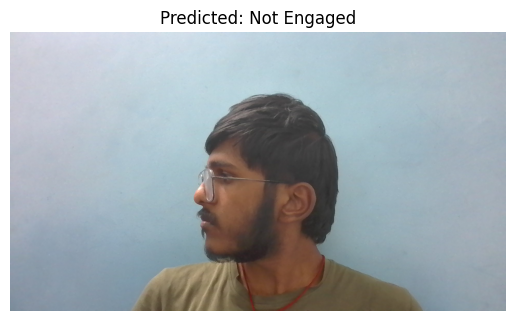

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.672245]]
The model predicts: Engaged


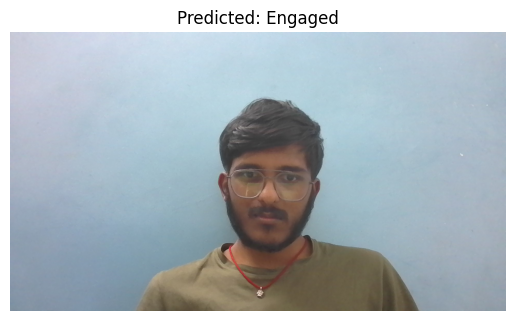

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.6009237]]
The model predicts: Engaged


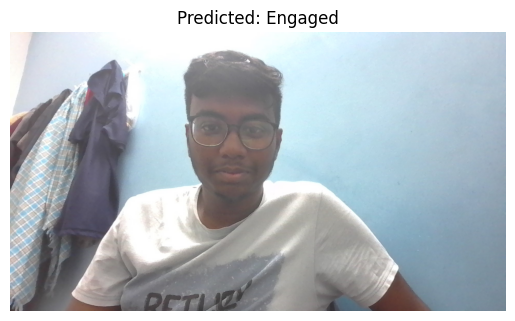

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.5925664]]
The model predicts: Not Engaged


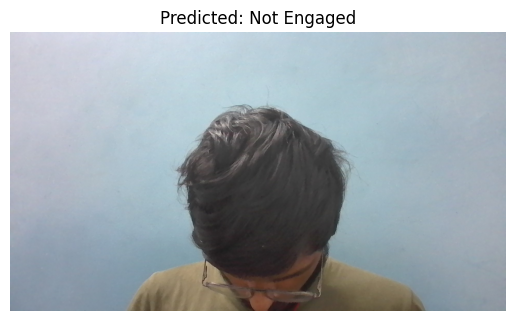

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img # Import load_img
import matplotlib.pyplot as plt # Import plt


def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Resize the image to the target size
    image = cv2.resize(image, (48, 48))
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert the image to an array
    image = img_to_array(image)
    # Normalize the image
    image = image / 255.0
    # Expand dimensions to match the model's input shape
    image = np.expand_dims(image, axis=0)
    return image

# Path to the input image
input_image_path = '/content/drive/MyDrive/TVAR3.jpg'  # Replace with the actual path to your image

# Preprocess the input image
preprocessed_image = preprocess_image(input_image_path)

# Make predictions
prediction = model.predict(preprocessed_image)
predicted_class = (prediction > 0.65).astype("int32")

print(prediction)
# Print the prediction
if predicted_class == 1:
    print("The model predicts: Engaged")
else:
    print("The model predicts: Not Engaged")

# Display the image along with the prediction result
img = load_img(input_image_path) # Call load_img directly
plt.imshow(img)
plt.title(f'Predicted: {"Engaged" if predicted_class.flatten()[0] == 1 else "Not Engaged"}') # Use predicted_class
plt.axis('off')
plt.show()

input_image_path = '/content/drive/MyDrive/TVAR1.jpg'  # Replace with the actual path to your image

# Preprocess the input image
preprocessed_image = preprocess_image(input_image_path)
# print(preprocessed_image)
# Make predictions
prediction = model.predict(preprocessed_image)
predicted_class = (prediction > 0.65).astype("int32")

print(prediction)
# Print the prediction
if predicted_class == 1:
    print("The model predicts: Engaged")
else:
    print("The model predicts: Not Engaged")

# Display the image along with the prediction result
img = load_img(input_image_path) # Call load_img directly
plt.imshow(img)
plt.title(f'Predicted: {"Engaged" if predicted_class.flatten()[0] == 1 else "Not Engaged"}') # Use predicted_class
plt.axis('off')
plt.show()

input_image_path = '/content/drive/MyDrive/gj1.jpg'  # Replace with the actual path to your image

# Preprocess the input image
preprocessed_image = preprocess_image(input_image_path)

# Make predictions
prediction = model.predict(preprocessed_image)
predicted_class = (prediction > 0.6).astype("int32")

print(prediction)
# Print the prediction
if predicted_class == 1:
    print("The model predicts: Engaged")
else:
    print("The model predicts: Not Engaged")

# Display the image along with the prediction result
img = load_img(input_image_path) # Call load_img directly
plt.imshow(img)
plt.title(f'Predicted: {"Engaged" if predicted_class.flatten()[0] == 1 else "Not Engaged"}') # Use predicted_class
plt.axis('off')
plt.show()

input_image_path = '/content/drive/MyDrive/TVAR4.jpg'  # Replace with the actual path to your image

# Preprocess the input image
preprocessed_image = preprocess_image(input_image_path)

# Make predictions
prediction = model.predict(preprocessed_image)
predicted_class = (prediction > 0.6).astype("int32")

print(prediction)
# Print the prediction
if predicted_class == 1:
    print("The model predicts: Engaged")
else:
    print("The model predicts: Not Engaged")

# Display the image along with the prediction result
img = load_img(input_image_path) # Call load_img directly
plt.imshow(img)
plt.title(f'Predicted: {"Engaged" if predicted_class.flatten()[0] == 1 else "Not Engaged"}') # Use predicted_class
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.load_model('/content/student_engagement_model.h5')

OSError: Unable to synchronously open file (file signature not found)

In [ ]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977,859 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

None
